<a href="https://colab.research.google.com/github/basangoudapatil/Task-8/blob/main/Logistic_Regression_Assignment12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Social_Network_Ads.csv

This dataset contains information of users in a social network. Those informations are the user id the gender the age and the estimated salary. A car company has just launched their brand new luxury SUV. And we're trying to see which of these users of the social network are going to buy this brand new SUV And the last column here tells If yes or no the user bought this SUV we are going to build a model that is going to predict if a user is going to buy or not the SUV based on two variables which are going to be the age and the estimated salary. So our matrix of feature is only going to be these two columns. We want to find some correlations between the age and the estimated salary of a user and his decision to purchase yes or no the SUV.


**Step 1 | Data Pre-Processing**

**Importing the Libraries**

In [6]:
import pandas as pd
import numpy as np

In [7]:
import matplotlib.pyplot as plt

**Importing the dataset**

In [8]:
df = pd.read_csv('/content/Social_Network_Ads.csv')
print(df.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [9]:
df.shape

(400, 5)

In [10]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [11]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [12]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [13]:
df = df.drop_duplicates()

**Splitting the dataset into the Training set and Test set**

In [14]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [15]:
from sklearn.model_selection import train_test_split

X = df[['Age','EstimatedSalary']] #All the rows of Age and Estimated Salary columns
y = df['Purchased'] #All the rows of Purchased column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [16]:
y_train

187    0
198    0
399    1
10     0
170    0
      ..
385    1
146    1
48     1
11     0
363    0
Name: Purchased, Length: 320, dtype: int64

In [17]:
X_train.shape, y_train.shape

((320, 2), (320,))

In [18]:
X_test.shape, y_test.shape

((80, 2), (80,))

**Feature Scaling**

In [19]:
#The data under age and Estimated Salary are not in the same scale
#So, data standardization is mandotary
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[['Age','EstimatedSalary']] = scaler.fit_transform(X_train[['Age','EstimatedSalary']])
X_test[['Age','EstimatedSalary']] = scaler.transform(X_test[['Age','EstimatedSalary']])

In [20]:
print(X_train.head())

          Age  EstimatedSalary
187 -0.454961        -0.810323
198 -1.122794         0.317083
399  1.071514        -0.954862
10  -1.122794         0.317083
170 -1.599818         0.548345


**Step 2 | Logistic Regression Model**

The library for this job which is going to be the linear model library and it is called linear because the logistic regression is a linear classifier which means that here since we're in two dimensions, our two categories of users are going to be separated by a straight line. Then import the logistic regression class. Next we will create a new object from this class which is going to be our classifier that we are going to fit on our training set.

**Fitting Logistic Regression to the Training set**

In [21]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

**Step 3 | Predection**

In [22]:
y_pred = logistic.predict(X_test)
print(y_pred)

[1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0
 1 0 0 0 1 0]


In [23]:
logistic.predict_proba(X_test)

array([[0.03463457, 0.96536543],
       [0.09982635, 0.90017365],
       [0.0067127 , 0.9932873 ],
       [0.73924259, 0.26075741],
       [0.09679368, 0.90320632],
       [0.01077291, 0.98922709],
       [0.96790499, 0.03209501],
       [0.7033807 , 0.2966193 ],
       [0.55699588, 0.44300412],
       [0.53535372, 0.46464628],
       [0.98405777, 0.01594223],
       [0.96720122, 0.03279878],
       [0.06455377, 0.93544623],
       [0.55602547, 0.44397453],
       [0.77833832, 0.22166168],
       [0.88205337, 0.11794663],
       [0.99423256, 0.00576744],
       [0.93468848, 0.06531152],
       [0.96867798, 0.03132202],
       [0.99760041, 0.00239959],
       [0.66130935, 0.33869065],
       [0.10371008, 0.89628992],
       [0.91797931, 0.08202069],
       [0.13129265, 0.86870735],
       [0.90151729, 0.09848271],
       [0.97314615, 0.02685385],
       [0.93451985, 0.06548015],
       [0.65804181, 0.34195819],
       [0.40794909, 0.59205091],
       [0.8642148 , 0.1357852 ],
       [0.

In [24]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df1.head())

     Actual  Predicted
252       1          1
365       1          1
227       1          1
31        1          0
242       1          1


**Step 4 | Evaluating The Predection**

We predicted the test results and now we will evaluate if our logistic regression model learned and understood correctly. So this confusion matrix is going to contain the correct predictions that our model made on the set as well as the incorrect predictions.

**Making the Confusion Matrix**

In [25]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames=['Predicted'])
print(confusion_matrix)

Predicted   0   1
Actual           
0          49   5
1           8  18


In [26]:
#Checking the accuracy of the model
from sklearn.metrics import accuracy_score
print('Logistic Regression accuray:', accuracy_score(y_test, y_pred))

Logistic Regression accuray: 0.8375


**Visualization**

In [27]:
import seaborn as sns

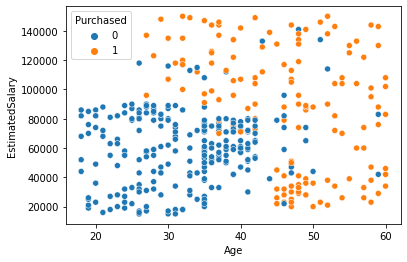

In [28]:
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data = df)

In [29]:
def plot_decision_boundary(clf, X, Y, cmap='Paired_r'):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    h = (x_max - x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap, edgecolors='k');

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


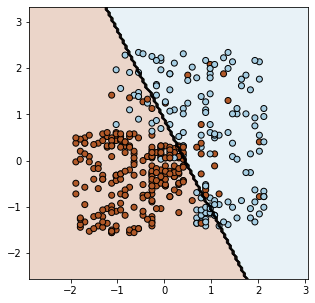

In [30]:
X_scaled  = scaler.transform(X[["Age", "EstimatedSalary"]]) 
plot_decision_boundary(logistic, X_scaled, y.values) #Calling the function and passing the values